<a href="https://colab.research.google.com/github/DanielleK2003/Finance/blob/main/Credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT RISK ANALYSIS**


For this Exercice, we use storage.googleapis.com which is the official domain for Google Cloud Storage, a service that allows developers to store and access data (files, images, videos) on Google's infrastructure. While legitimate for cloud hosting



# Data loading & cleaning

In [1]:
import pandas as pd

url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"

data = pd.read_csv(url)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Let's rename the Class column for a beter understanding

data = data.rename(columns={'Class': 'default'})

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,default
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Understand DATA & Analysis
Each row = one financial transaction
Each column = information about the transaction

Most important column: Class

Class = 0 → normal (no risk)

Class = 1 → fraud / high risk

In [9]:
# Total number of transactions in the dataset
total_transactions = len(data)
total_transactions

284807

In [6]:
# Number of safe vs risky transactions
data['default'].value_counts() #this calculation give 0 for safe and 1 for unsafe transactions

,count
default,
0,284315
1,492


In [7]:
# Default rate calculation
default_rate = data['default'].mean()

print("Default rate:", round(default_rate * 100, 2), "%")

Default rate: 0.17 %


In [17]:
# ----------------------------------------
# GROUP TRANSACTIONS BY RISK LEVEL
# Equivalent SQL: SELECT default, COUNT(*) FROM table GROUP BY default;
# ----------------------------------------

# Count number of transactions for each risk category
risk_summary = data.groupby('default').size()

# ----------------------------------------
# CALCULATE PERCENTAGE OF EACH RISK GROUP
# Equivalent SQL: SELECT default, COUNT(*) / TOTAL * 100
# ----------------------------------------

# Calculate percentage of safe vs risky transactions
risk_percent = data['default'].value_counts(normalize=True) * 100


print(risk_summary)
print(risk_percent)

# ----------------------------------------
# SUMMARY TABLE
# This is used in dashboards and reports
# ----------------------------------------

# Group data and count transactions
report = data.groupby('default').agg(
    total_transactions=('default', 'count')
)

# Calculate percentage column
report['percentage'] = (report['total_transactions'] / len(data)) * 100

print("\n","Summary Table")
report

default
0    284315
1       492
dtype: int64
default
0    99.827251
1     0.172749
Name: proportion, dtype: float64

 Summary Table


,total_transactions,percentage
default,,
0,284315,99.827251
1,492,0.172749


#Summary

Total transactions: 284,807

Risky transactions: 492

Default rate: 0.17%

# Segmentation

In [18]:
# Create amount categories (we are using quantile and we go for q = 4 quartile)
data['amount_segment'] = pd.qcut(
    data['Amount'],   # column to segment
    q=4,              # divide into 4 equal groups
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Show first rows
data[['Amount', 'amount_segment']].head()

,Amount,amount_segment
0,149.62,Very High
1,2.69,Low
2,378.66,Very High
3,123.50,Very High
4,69.99,High


In [21]:
# DEFAULT RATE BY AMOUNT SEGMENT


segment_risk = data.groupby('amount_segment')['default'].mean() * 100

print(segment_risk)

# Summary
segmentation_report = data.groupby('amount_segment').agg(
    total_transactions=('default', 'count'),
    total_defaults=('default', 'sum'),
    default_rate=('default', 'mean')
)

# Convert default_rate to percentage
segmentation_report['default_rate'] *= 100

print("\n","Segmentation Report Summary")
segmentation_report

amount_segment
Low          0.314426
Medium       0.065824
High         0.066233
Very High    0.244375
Name: default, dtype: float64

 Segmentation Report Summary


/tmp/ipython-input-4262536186.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_risk = data.groupby('amount_segment')['default'].mean() * 100
/tmp/ipython-input-4262536186.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_report = data.groupby('amount_segment').agg(


,total_transactions,total_defaults,default_rate
amount_segment,,,
Low,71241,224,0.314426
Medium,71402,47,0.065824
High,70962,47,0.066233
Very High,71202,174,0.244375


# Visualisation

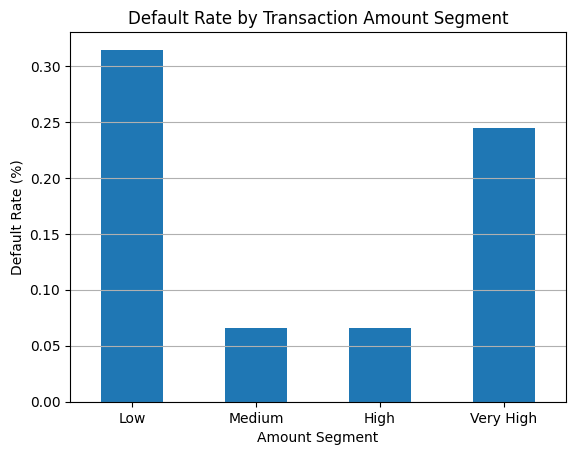

In [22]:
import matplotlib.pyplot as plt

# Plot default rate per segment
segmentation_report['default_rate'].plot(kind='bar')

# Add title and labels
plt.title("Default Rate by Transaction Amount Segment")
plt.xlabel("Amount Segment")
plt.ylabel("Default Rate (%)")

# Improve readability
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show chart
plt.show()

# Prediction Model

In [31]:
# Convert amount_segment into numeric variables because the model works with numerical values
data_encoded = pd.get_dummies(data, columns=['amount_segment'], drop_first=True) # Note that the Low column (the first one) becomes the reference category because of drop_first=True (when all 3 Ccolumns are 0 of fals mean low is true or 1)

data_encoded.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,default,amount_segment_Medium,amount_segment_High,amount_segment_Very High
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,False,False,True
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,False,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,False,False,True
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,False,False,True
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,False,True,False


In [32]:
# Features (input variables)
X = data_encoded.drop(columns=['default'])

# Target variable (what we predict)
y = data_encoded['default']

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (284807, 33)
Target shape: (284807,)


In [33]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 227845
Test samples: 56962


In [34]:
# Model training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
predictions = model.predict(X_test)

In [36]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print("Model accuracy:", round(accuracy * 100, 2), "%")

Model accuracy: 99.9 %


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[56853    11]
 [   44    54]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.55      0.66        98

    accuracy                           1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



# Interpretation

Overall Accuracy: Close to 100% → the model predicts most transactions correctly.

Class 0 (Safe):

Precision ≈ 1 → almost all safe transactions predicted safe

Recall ≈ 1 → very few safe transactions misclassified

Class 1 (Default):

Precision ≈ 0.90 → 90% of predicted defaults were true defaults

Recall = 0.55 → model correctly identifies 55% of actual defaults

The dataset is highly imbalanced: very few defaults compared to safe transactions.

Accuracy looks high because predicting all transactions as safe would already give very high accuracy.

Recall is more important than accuracy in credit risk, because we care about identifying risky borrowers.

CONCLUSION: The model achieves a moderate recall rate (55%) for defaults due to the imbalance between safe and risky transactions, while maintaining very high accuracy for safe transactions. This illustrates the practical challenges of credit risk modeling and underscores the importance of striking a balance between recall and accuracy when identifying risky borrowers.




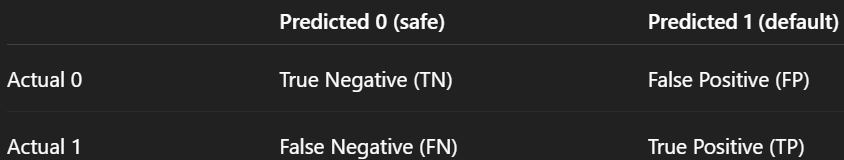

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 * (precision * recall) / (precision + recall)

To ameliorate this prediction, 3 tools can be used:

*   Use other models: Random Forest, XGBoost, which handle imbalance better.
*   Resample dataset: oversample defaults or undersample safe transactions.
*   Use class weighting in logistic regression


